In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

from skimage.morphology import closing, square
from tools import *
from plot import *

In [2]:
indiana_img = np.load('../data/indianapines.npy')
indiana_labels = np.load('../data/indianapines_gt.npy')
salinas_img = np.load('../data/salinas.npy')
salinas_labels = np.load('../data/salinas_gt.npy')

In [3]:
np.unique(indiana_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=uint8)

In [4]:
# normalize radiance values to get reflectance values
indiana_img = indiana_img / indiana_img.max()
salinas_img = salinas_img / salinas_img.max()

In [5]:
print("Indiana shape: {}".format(indiana_img.shape))
print("Salinas shape: {}".format(salinas_img.shape))

Indiana shape: (145, 145, 200)
Salinas shape: (512, 217, 204)


In [6]:
X_indiana = indiana_img.reshape((-1, indiana_img.shape[-1])) # reshaping the HSI as a 2D matrix
print("Indiana shape: {}".format(X_indiana.shape))

X_salinas = salinas_img.reshape((-1, salinas_img.shape[-1])) # reshaping the HSI as a 2D matrix
print("Salinas shape: {}".format(X_salinas.shape))

Indiana shape: (21025, 200)
Salinas shape: (111104, 204)


In [7]:
n_cluster_indiana = len(np.unique(indiana_labels)) - 1
n_cluster_salinas = len(np.unique(salinas_labels)) - 1

## Remove unclassified data

In [8]:
X_indiana, X_indiana_idx = remove_unclassified_input(X_indiana, indiana_labels)
X_salinas, X_salinas_idx = remove_unclassified_input(X_salinas, salinas_labels)

In [9]:
print(X_indiana.shape)
print(X_indiana_idx.shape)
print(X_salinas.shape)

(10249, 200)
(10249,)
(54129, 204)


In [10]:
indiana_labels, _ = remove_unclassified_input(indiana_labels.flatten(), indiana_labels)
salinas_labels, _ = remove_unclassified_input(salinas_labels.flatten(), salinas_labels)

In [11]:
print(indiana_labels.shape)
print(salinas_labels.shape)

(10249,)
(54129,)


## PCA

In [12]:
n_components_indiana = get_number_components(X_indiana)
n_components_salinas = get_number_components(X_salinas)

Fitting the PCA
Fitting the PCA


In [13]:
print("Number of components Indiana: {}".format(n_components_indiana))
print("Number of components Salinas: {}".format(n_components_salinas))

Number of components Indiana: 68
Number of components Salinas: 5


In [14]:
X_indiana_reduced = extract_features(X_indiana, n_components_indiana)
X_salinas_reduced = extract_features(X_salinas, n_components_salinas)

In [15]:
print("Indiana reduced data shape: {}".format(X_indiana_reduced.shape))
print("Salinas reduced data shape: {}".format(X_salinas_reduced.shape))

Indiana reduced data shape: (10249, 68)
Salinas reduced data shape: (54129, 5)


## Split train / test

In [16]:
# shuffle manually
X_indiana_shuffle, indiana_labels_shuffle, shuffle_arr = shuffle(X_salinas_reduced, salinas_labels)

# shuffle index
#X_indiana_idx[np.arange(indiana_labels_shuffle.size)] = X_indiana_idx[shuffle_arr]

In [17]:
unmapping_shuffle = np.empty(shuffle_arr.size,  dtype=int)
unmapping_shuffle[shuffle_arr] = np.arange(shuffle_arr.size)

In [18]:
# nb_test = int(X_indiana_shuffle.shape[0] * 0.25)
# X_train_indiana = X_indiana_shuffle[nb_test:]
# y_train_indiana = indiana_labels_shuffle[nb_test:]
# X_test_indiana = X_indiana_shuffle[:nb_test]
# y_test_indiana = indiana_labels_shuffle[:nb_test]

In [19]:
y_indiana_labels_argsort = np.argsort(indiana_labels_shuffle)

In [20]:
#unmapping_argsort = np.empty(y_indiana_labels_argsort.size, dtype=int)
#unmapping_argsort[y_indiana_labels_argsort] = np.arange(y_indiana_labels_argsort.size)
unmapping_argsort = np.argsort(y_indiana_labels_argsort)

In [21]:
for i in range(1, n_cluster_indiana + 1):
    print(indiana_labels_shuffle[indiana_labels_shuffle == i].size)    

2009
3726
1976
1394
2678
3959
3579
11271
6203
3278
1068
1927
916
1070
7268
1807


In [22]:
labels, count = np.unique(indiana_labels_shuffle-1, return_counts=True)

In [23]:
x_train_indiana, x_test_indiana, y_train_indiana_labels, y_test_indiana_labels = split_x_train_test(X_indiana_shuffle, count, labels, y_indiana_labels_argsort, (0, n_components_salinas))

Cluster: 0
Nb total samples: 2009
Nb samples train: 1506
Nb samples test: 503
---------------
Cluster: 1
Nb total samples: 3726
Nb samples train: 2794
Nb samples test: 932
---------------
Cluster: 2
Nb total samples: 1976
Nb samples train: 1482
Nb samples test: 494
---------------
Cluster: 3
Nb total samples: 1394
Nb samples train: 1045
Nb samples test: 349
---------------
Cluster: 4
Nb total samples: 2678
Nb samples train: 2008
Nb samples test: 670
---------------
Cluster: 5
Nb total samples: 3959
Nb samples train: 2969
Nb samples test: 990
---------------
Cluster: 6
Nb total samples: 3579
Nb samples train: 2684
Nb samples test: 895
---------------
Cluster: 7
Nb total samples: 11271
Nb samples train: 8453
Nb samples test: 2818
---------------
Cluster: 8
Nb total samples: 6203
Nb samples train: 4652
Nb samples test: 1551
---------------
Cluster: 9
Nb total samples: 3278
Nb samples train: 2458
Nb samples test: 820
---------------
Cluster: 10
Nb total samples: 1068
Nb samples train: 801


In [24]:
print("Train shape: {}".format(x_train_indiana.shape))
print("Train labels shape: {}".format(y_train_indiana_labels.shape))
print("Test shape: {}".format(x_test_indiana.shape))
print("Test labels shape: {}".format(y_test_indiana_labels.shape))

Train shape: (40592, 5)
Train labels shape: (40592,)
Test shape: (13537, 5)
Test labels shape: (13537,)


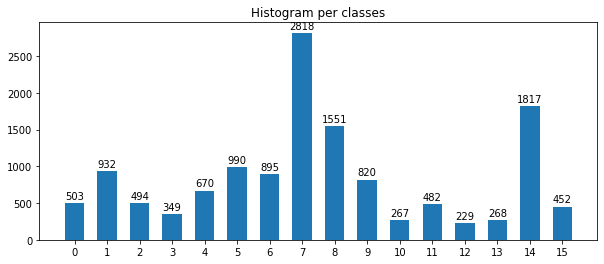

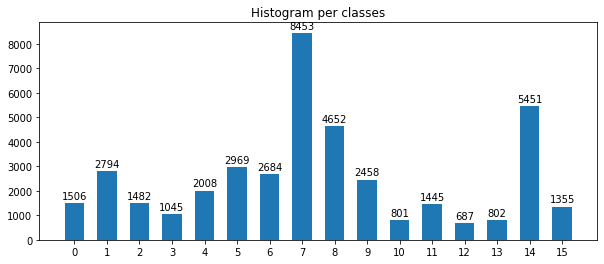

In [25]:
plot_histogram(y_test_indiana_labels)
plot_histogram(y_train_indiana_labels)

In [26]:
print("X_train shape: {}".format(x_train_indiana.shape))
print("X_test shape: {}".format(x_test_indiana.shape))
print("y_train shape: {}".format(y_train_indiana_labels.shape))
print("y_test shape: {}".format(y_test_indiana_labels.shape))

X_train shape: (40592, 5)
X_test shape: (13537, 5)
y_train shape: (40592,)
y_test shape: (13537,)


## Random Forest

In [27]:
modelRF = RandomForestClassifier(n_estimators=100, verbose=1, n_jobs=8)

In [28]:
modelRF.fit(x_train_indiana, y_train_indiana_labels)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.2s finished


RandomForestClassifier(n_jobs=8, verbose=1)

In [29]:
# training score
modelRF.score(x_train_indiana, y_train_indiana_labels)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished


1.0

In [30]:
modelRF.verbose = 0
for cluster in labels:
    idxs = np.argwhere(y_train_indiana_labels == cluster).flatten()
    score = modelRF.score(x_train_indiana[idxs], y_train_indiana_labels[idxs])
    print("Cluster: {}".format(cluster))
    print("Nb samples: {}".format(y_train_indiana_labels[idxs].size))
    print("Score: {}".format(score))
    print("-----------")

Cluster: 0
Nb samples: 1506
Score: 1.0
-----------
Cluster: 1
Nb samples: 2794
Score: 1.0
-----------
Cluster: 2
Nb samples: 1482
Score: 1.0
-----------
Cluster: 3
Nb samples: 1045
Score: 1.0
-----------
Cluster: 4
Nb samples: 2008
Score: 1.0
-----------
Cluster: 5
Nb samples: 2969
Score: 1.0
-----------
Cluster: 6
Nb samples: 2684
Score: 1.0
-----------
Cluster: 7
Nb samples: 8453
Score: 1.0
-----------
Cluster: 8
Nb samples: 4652
Score: 1.0
-----------
Cluster: 9
Nb samples: 2458
Score: 1.0
-----------
Cluster: 10
Nb samples: 801
Score: 1.0
-----------
Cluster: 11
Nb samples: 1445
Score: 1.0
-----------
Cluster: 12
Nb samples: 687
Score: 1.0
-----------
Cluster: 13
Nb samples: 802
Score: 1.0
-----------
Cluster: 14
Nb samples: 5451
Score: 1.0
-----------
Cluster: 15
Nb samples: 1355
Score: 1.0
-----------


In [31]:
# testing score
modelRF.score(x_test_indiana, y_test_indiana_labels)

0.9392036640319126

In [32]:
mean_score = 0
for cluster in labels:
    idxs = np.argwhere(y_test_indiana_labels == cluster).flatten()
    score = modelRF.score(x_test_indiana[idxs], y_test_indiana_labels[idxs])
    mean_score += score
    print("Cluster: {}".format(cluster))
    print("Nb samples: {}".format(y_test_indiana_labels[idxs].size))
    print("Score: {}".format(score))
    print("-----------")
    
mean_score /= len(labels)
print(mean_score)

Cluster: 0
Nb samples: 503
Score: 0.9880715705765407
-----------
Cluster: 1
Nb samples: 932
Score: 1.0
-----------
Cluster: 2
Nb samples: 494
Score: 0.9939271255060729
-----------
Cluster: 3
Nb samples: 349
Score: 0.997134670487106
-----------
Cluster: 4
Nb samples: 670
Score: 0.991044776119403
-----------
Cluster: 5
Nb samples: 990
Score: 1.0
-----------
Cluster: 6
Nb samples: 895
Score: 0.9955307262569832
-----------
Cluster: 7
Nb samples: 2818
Score: 0.8988644428672817
-----------
Cluster: 8
Nb samples: 1551
Score: 0.9974210186976145
-----------
Cluster: 9
Nb samples: 820
Score: 0.9585365853658536
-----------
Cluster: 10
Nb samples: 267
Score: 0.9700374531835206
-----------
Cluster: 11
Nb samples: 482
Score: 1.0
-----------
Cluster: 12
Nb samples: 229
Score: 1.0
-----------
Cluster: 13
Nb samples: 268
Score: 0.9776119402985075
-----------
Cluster: 14
Nb samples: 1817
Score: 0.7462850853054486
-----------
Cluster: 15
Nb samples: 452
Score: 0.9889380530973452
-----------
0.96896271548

In [33]:
preds = modelRF.predict(X_salinas_reduced)

In [34]:
#preds_test = modelRF.predict(x_test_indiana)
#preds_train = modelRF.predict(x_train_indiana)

In [35]:
#preds_test = y_test_indiana_labels
#preds_train = y_train_indiana_labels

In [36]:
#print(preds_train.shape)
#print(preds_test.shape)

In [37]:
print(salinas_labels.shape)
print(preds.shape)

(54129,)
(54129,)


In [43]:
plot_confusion_matrix(salinas_labels - 1, preds - 1, class_names=np.arange(1, 16))

ValueError: Shape of passed values is (16, 15), indices imply (15, 15)

In [ ]:
plot_confusion_matrix(y_test_indiana_labels, preds_test, class_names=np.arange(1, 16), log=True)

In [44]:
#sum_train = 0
#sum_test = 0

#preds_indiana = np.empty([])
#y_indiana_labels = np.array([])

#for cluster in labels:
#    idx = int(count[cluster] * 0.75)
    
#    preds_indiana = np.hstack((preds_indiana, preds_train[sum_train:sum_train+idx]))
#    preds_indiana = np.hstack((preds_indiana, preds_test[sum_test:sum_test+count[cluster]-idx]))
    
#    y_indiana_labels = np.hstack((y_indiana_labels, y_train_indiana_labels[sum_train:sum_train+idx]))
#    y_indiana_labels = np.hstack((y_indiana_labels, y_test_indiana_labels[sum_test:sum_test+count[cluster]-idx]))
    
#    print("Cluster: {}".format(cluster))
#    print("Nb total samples: {}".format(count[cluster]))
#    print("Nb samples train: {}".format(idx))
#    print("Nb samples test: {}".format(count[cluster] - idx))
#    print("---------------")
#    sum_train += idx
#    sum_test += count[cluster] - idx

In [45]:
# unargsort
#preds_indiana = preds_indiana[unmapping_argsort]
#y_indiana_labels = y_indiana_labels[unmapping_argsort]

In [46]:
#preds_img = np.zeros((indiana_img.shape[0] * indiana_img.shape[1]))
#label_img = np.zeros((indiana_img.shape[0] * indiana_img.shape[1]))

In [47]:
# unshuffle
#preds_img[X_indiana_idx] = preds_indiana[unmapping_shuffle.astype(int)]
#label_img[X_indiana_idx] = y_indiana_labels[unmapping_shuffle.astype(int)]

In [48]:
#preds_img[X_indiana_idx] = preds
#label_img[X_indiana_idx] = y_indiana_labels

In [49]:
#print(preds_img.shape)
#print(label_img.shape)

In [64]:
preds_img = np.zeros((salinas_img.shape[0] * salinas_img.shape[1]))
label_img = np.zeros((salinas_img.shape[0] * salinas_img.shape[1]))

In [65]:
preds_img[X_salinas_idx] = preds + 1
preds_img = preds_img.reshape((salinas_img.shape[0], salinas_img.shape[1]))

In [66]:
label_img[X_salinas_idx] = salinas_labels
label_img = label_img.reshape((salinas_img.shape[0], salinas_img.shape[1]))

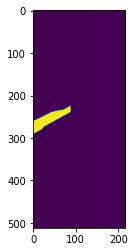

In [67]:
plt.imshow(get_label(label_img, 1))
plt.show()

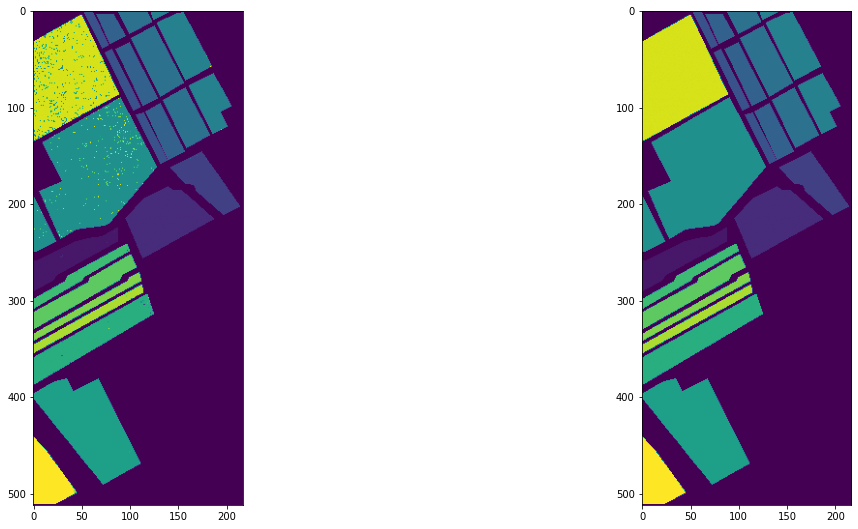

In [68]:
plot_two_figures(preds_img, label_img, figsize=(20, 20))

In [69]:
l, p = compute_labels_correspondence(label_img, preds_img, n_cluster_salinas)

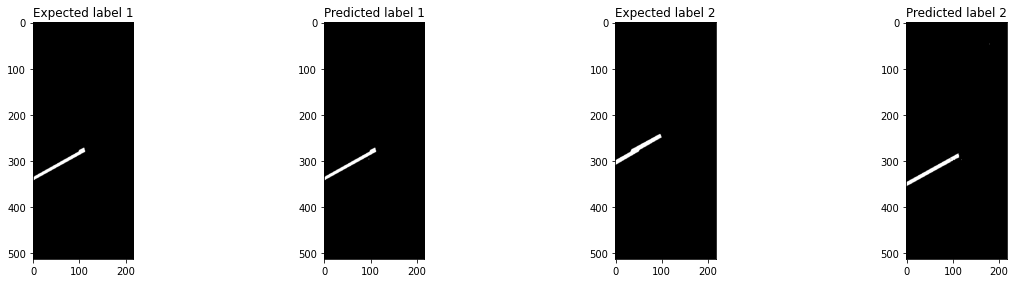

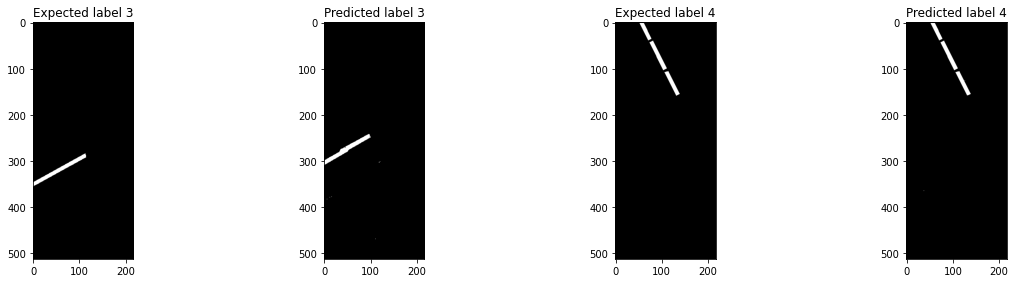

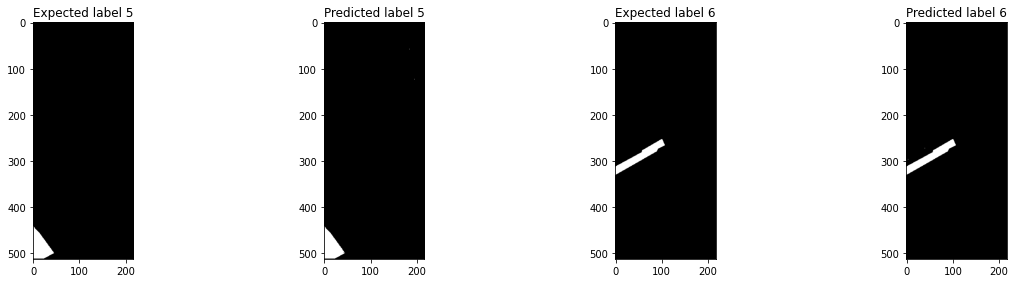

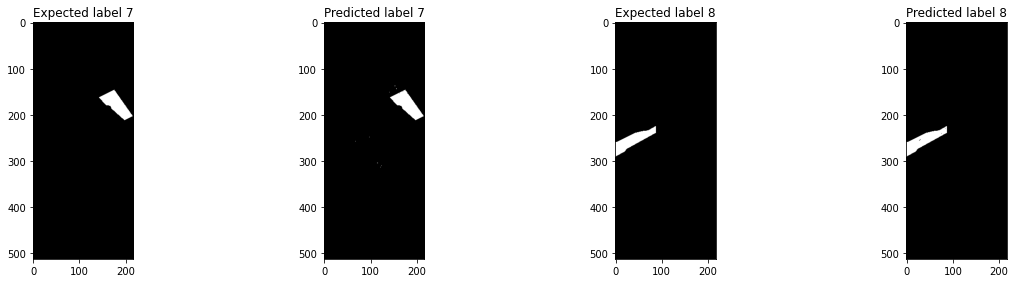

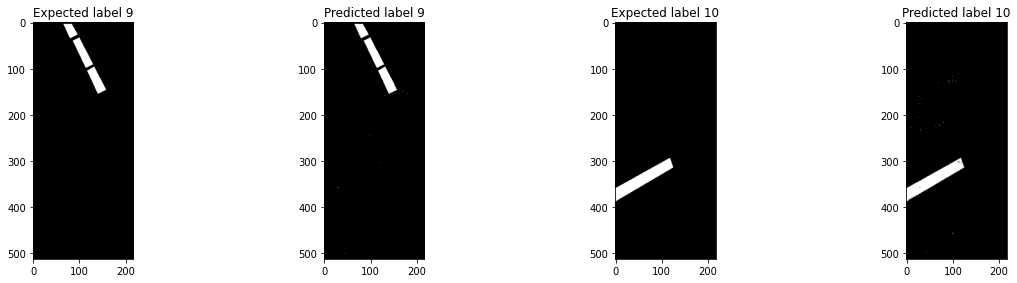

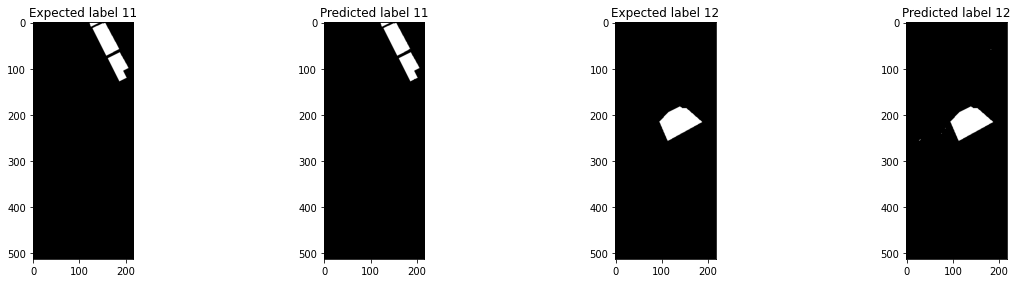

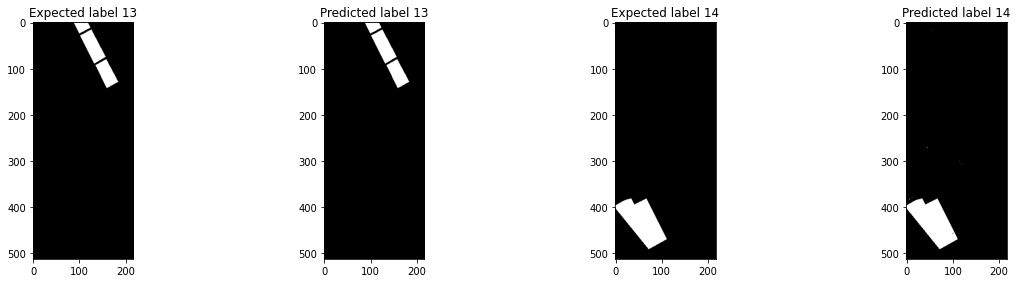

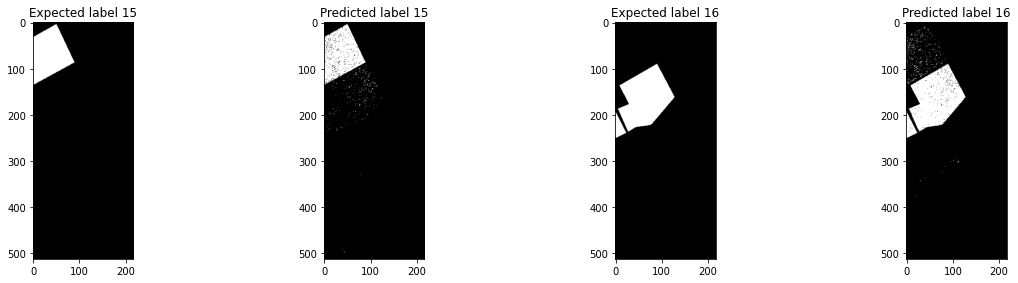

In [70]:
plot_each_labels(l, p, n_cluster_indiana, figsize=(20, 20), cmap='gray')